<a href="https://colab.research.google.com/github/samir1120k/Machine-Learning-Project/blob/wine-Quality-Prediction/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


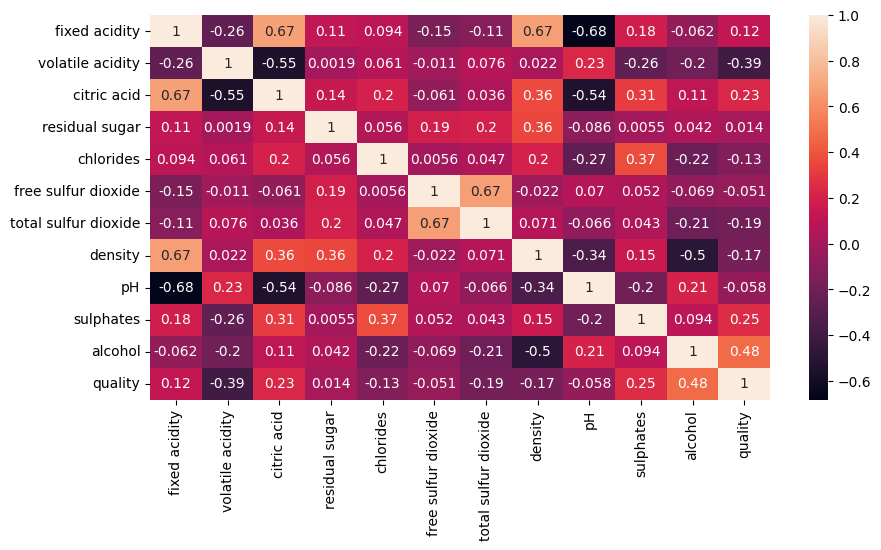

In [6]:
plt.figure(figsize=(10,5))
corr=data.corr()
sns.heatmap(data.corr(), annot=True)
plt.savefig('correlation matrix.png')
plt.show()

In [7]:
from scipy import stats
z=np.abs(stats.zscore(data))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [9]:
new_data=data[(z<3).all(axis=1)]

In [10]:
new_data.shape

(1451, 12)

In [14]:
from sklearn.model_selection import train_test_split
x=new_data.drop(columns='quality')
y=new_data['quality']


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
predict=rf_classifier.predict(x_test)

In [23]:
predict

array([6, 5, 5, 6, 5, 6, 4, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 5, 6, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6,
       7, 6, 7, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5,
       6, 5, 5, 6, 5, 6, 6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 7,
       5, 7, 5, 6, 6, 6, 5, 6, 7, 7, 5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 7,
       5, 7, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 6, 7, 6, 5, 6, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6,
       5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 7, 6, 7, 5, 5, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5,
       6, 7, 7, 6, 5, 7, 5, 6, 7, 5, 5, 5, 6, 7, 6, 6, 7, 6, 5, 5, 6, 5,
       7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6,
       5, 6, 6, 7, 6, 7, 7, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 7, 6, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 6])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.718213058419244

**optimize model by tunning hyperparmeter**

[Text(0.4245875, 0.9722222222222222, 'x[10] <= 10.35\ngini = 0.641\nsamples = 737\nvalue = [36, 501, 455, 151, 17]'),
 Text(0.15920833333333334, 0.9166666666666666, 'x[1] <= 0.317\ngini = 0.509\nsamples = 399\nvalue = [18, 398, 207, 14, 4]'),
 Text(0.29189791666666665, 0.9444444444444444, 'True  '),
 Text(0.021333333333333333, 0.8611111111111112, 'x[8] <= 2.93\ngini = 0.529\nsamples = 30\nvalue = [1, 11, 35, 4, 3]'),
 Text(0.017066666666666667, 0.8055555555555556, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 3]'),
 Text(0.0256, 0.8055555555555556, 'x[4] <= 0.089\ngini = 0.476\nsamples = 29\nvalue = [1, 11, 35, 4, 0]'),
 Text(0.021333333333333333, 0.75, 'x[6] <= 47.5\ngini = 0.374\nsamples = 26\nvalue = [1, 5, 35, 4, 0]'),
 Text(0.0128, 0.6944444444444444, 'x[7] <= 0.996\ngini = 0.193\nsamples = 21\nvalue = [1, 0, 34, 3, 0]'),
 Text(0.008533333333333334, 0.6388888888888888, 'x[8] <= 3.325\ngini = 0.375\nsamples = 2\nvalue = [1, 0, 0, 3, 0]'),
 Text(0.004266666666666667, 0.583333333333

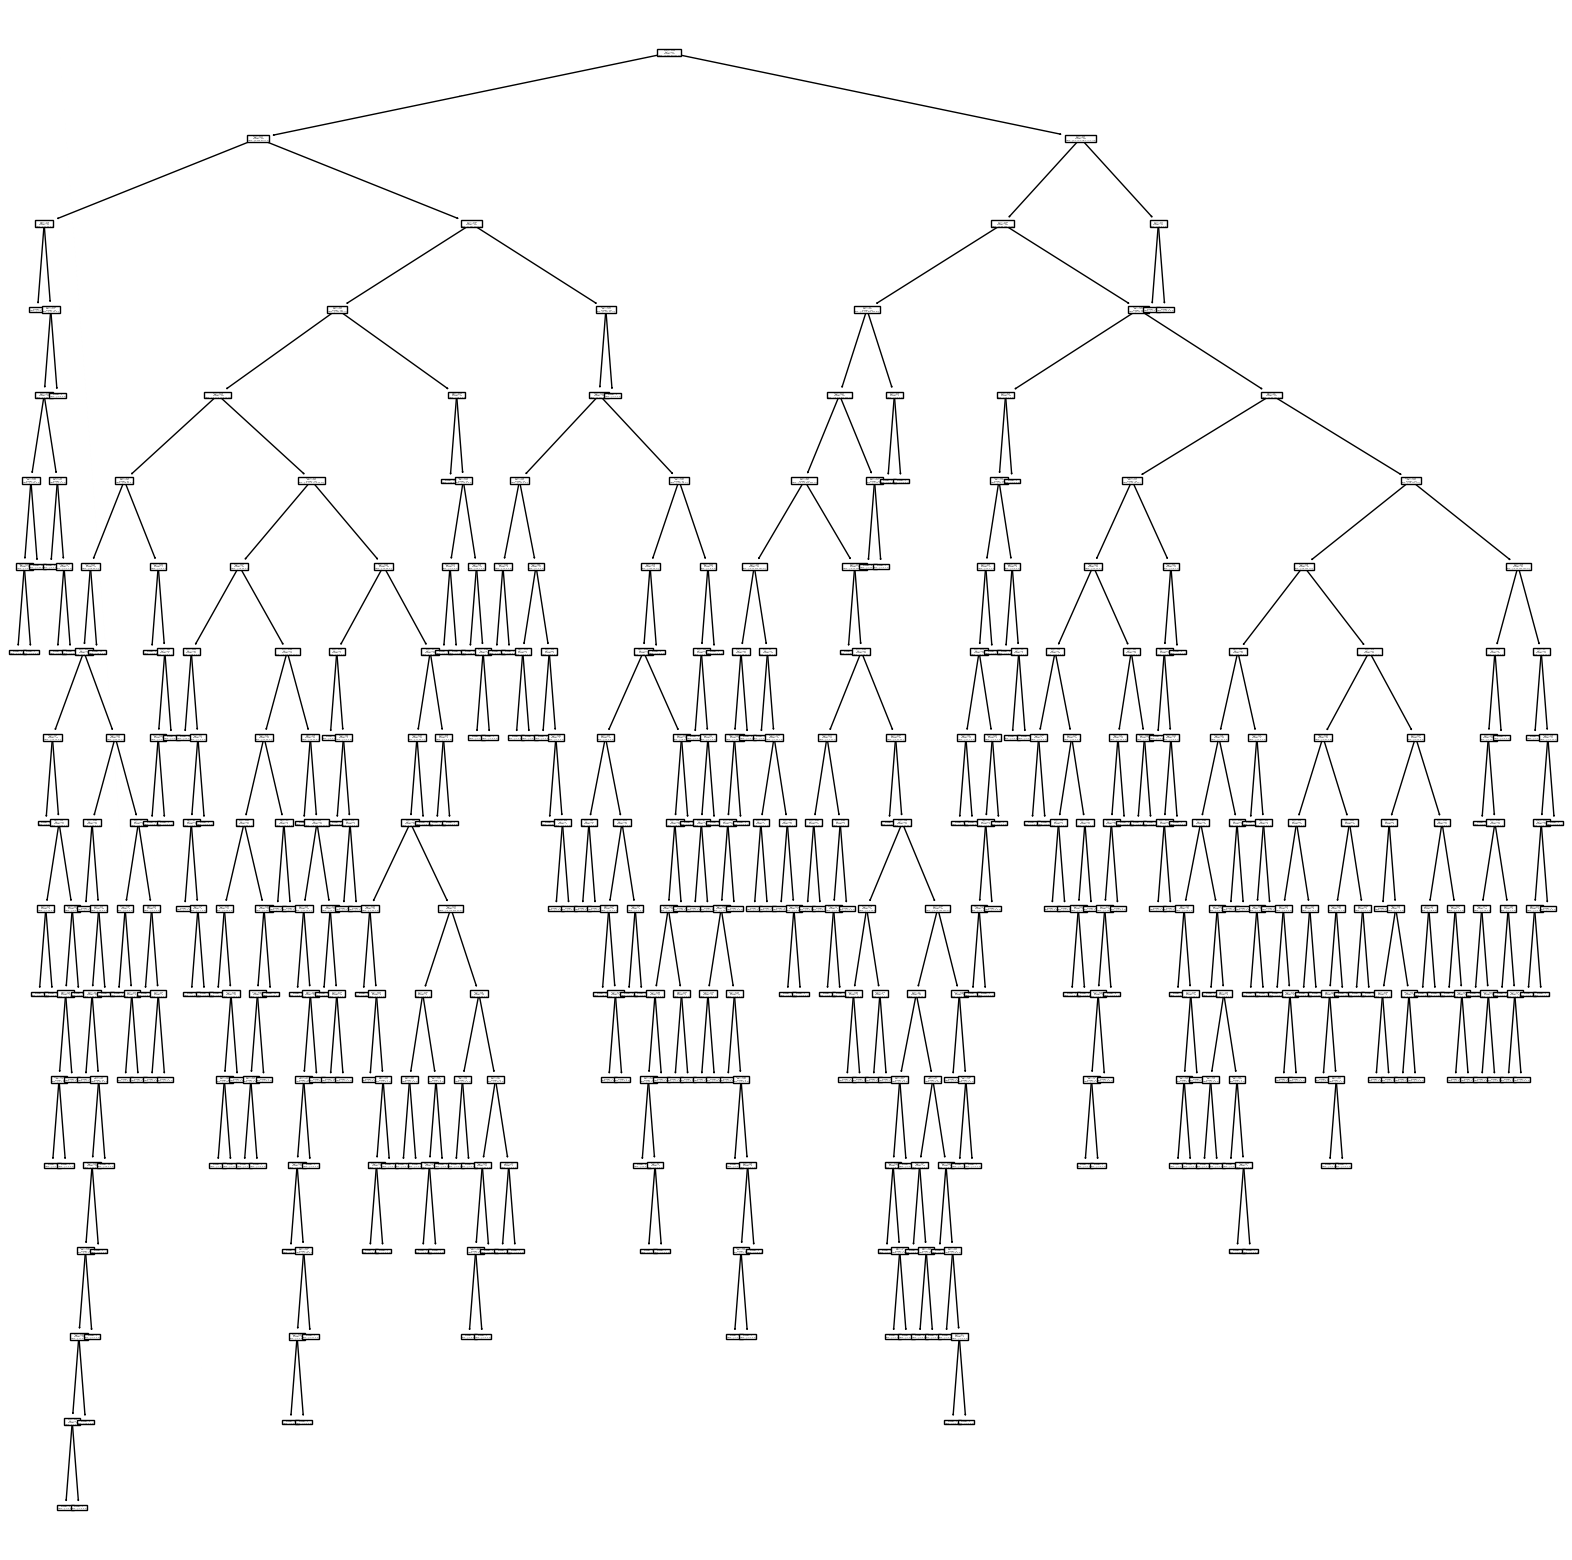

In [27]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(rf_classifier.estimators_[0])

